# <center> <img src="../../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
### <center> **Big Data** </center>
---
### <center> **Spring 2025** </center>
---
**Mid-term exam**

**Date**: 3/12/2025

**Student Name**: Juan Pablo Cortez Navarro

**Professor**: Pablo Camarillo Ramirez

In [52]:
import findspark
findspark.init()

In [53]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SparkSQL-Exam-1-Juan-Pablo") \
    .master("spark://1c173c8c3406:7077") \
    .config("spark.ui.port","4040") \
    .getOrCreate()
sc = spark.sparkContext

In [54]:
from grandeInformacion.spark_utils import SparkUtils
product_schema = SparkUtils.generate_schema([("product_id", "integer"), ("product_name", "string"), ("category", "string"), ("price", "float")])

product_df = spark.read \
                .schema(product_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/products.csv")

product_df.printSchema()

root
 |-- product_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- price: float (nullable = true)



In [55]:
sales_schema = SparkUtils.generate_schema([("transaction_id", "integer"), ("product_id", "integer"), ("customer_id", "integer"), ("sale_amount", "float"), ("sale_date", "string")])

sales_df = spark.read \
                .schema(sales_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/sales.csv")

sales_df.printSchema()

root
 |-- transaction_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- sale_amount: float (nullable = true)
 |-- sale_date: string (nullable = true)



In [56]:
# Join the sales DataFrame with the products DataFrame on product_id to enrich the sales data with product details.

joined_df = product_df.join(sales_df, product_df["product_id"] == sales_df["product_id"], "inner")

In [57]:
# Calculate the total sales amount (sale_amount) for each product category (category).

from pyspark.sql.functions import lit, when, sum

modified_df = joined_df.groupBy("category").agg(sum("sale_amount").alias("total_sales"))
modified_df.show()

+---------------+-----------------+
|       category|      total_sales|
+---------------+-----------------+
|    Electronics|317551.3197488785|
|       Clothing|456678.1796798706|
|          Books|351332.6302576065|
|Home Appliances|186122.4900817871|
|           Toys|593078.7292060852|
+---------------+-----------------+



In [58]:
# Transformations (Using when())

modified_df = joined_df.withColumn("sale_type", \
   when((joined_df.sale_amount >= 50), lit("High")) \
     .otherwise(lit("Low")) \
  )


In [59]:
# Filter the enriched sales DataFrame to include only rows where the category is "Electronics".

filtered_df = modified_df.select("*").where("category = 'Electronics'")


In [60]:
# Select only the product_name, sale_amount, and sale_type columns from the filtered DataFrame.

selected_df = filtered_df.select("product_name", "sale_amount", "sale_type")

# Add to your Notebook an Screenshot of the DAG associated with your spark application. Your name should be visible and it should be the name of the application.

![spark_cluster/notebooks/labs/img/Screenshot 2025-03-12 at 7.12.44 p.m..png](<attachment:Screenshot 2025-03-12 at 7.10.21 p.m..png>)
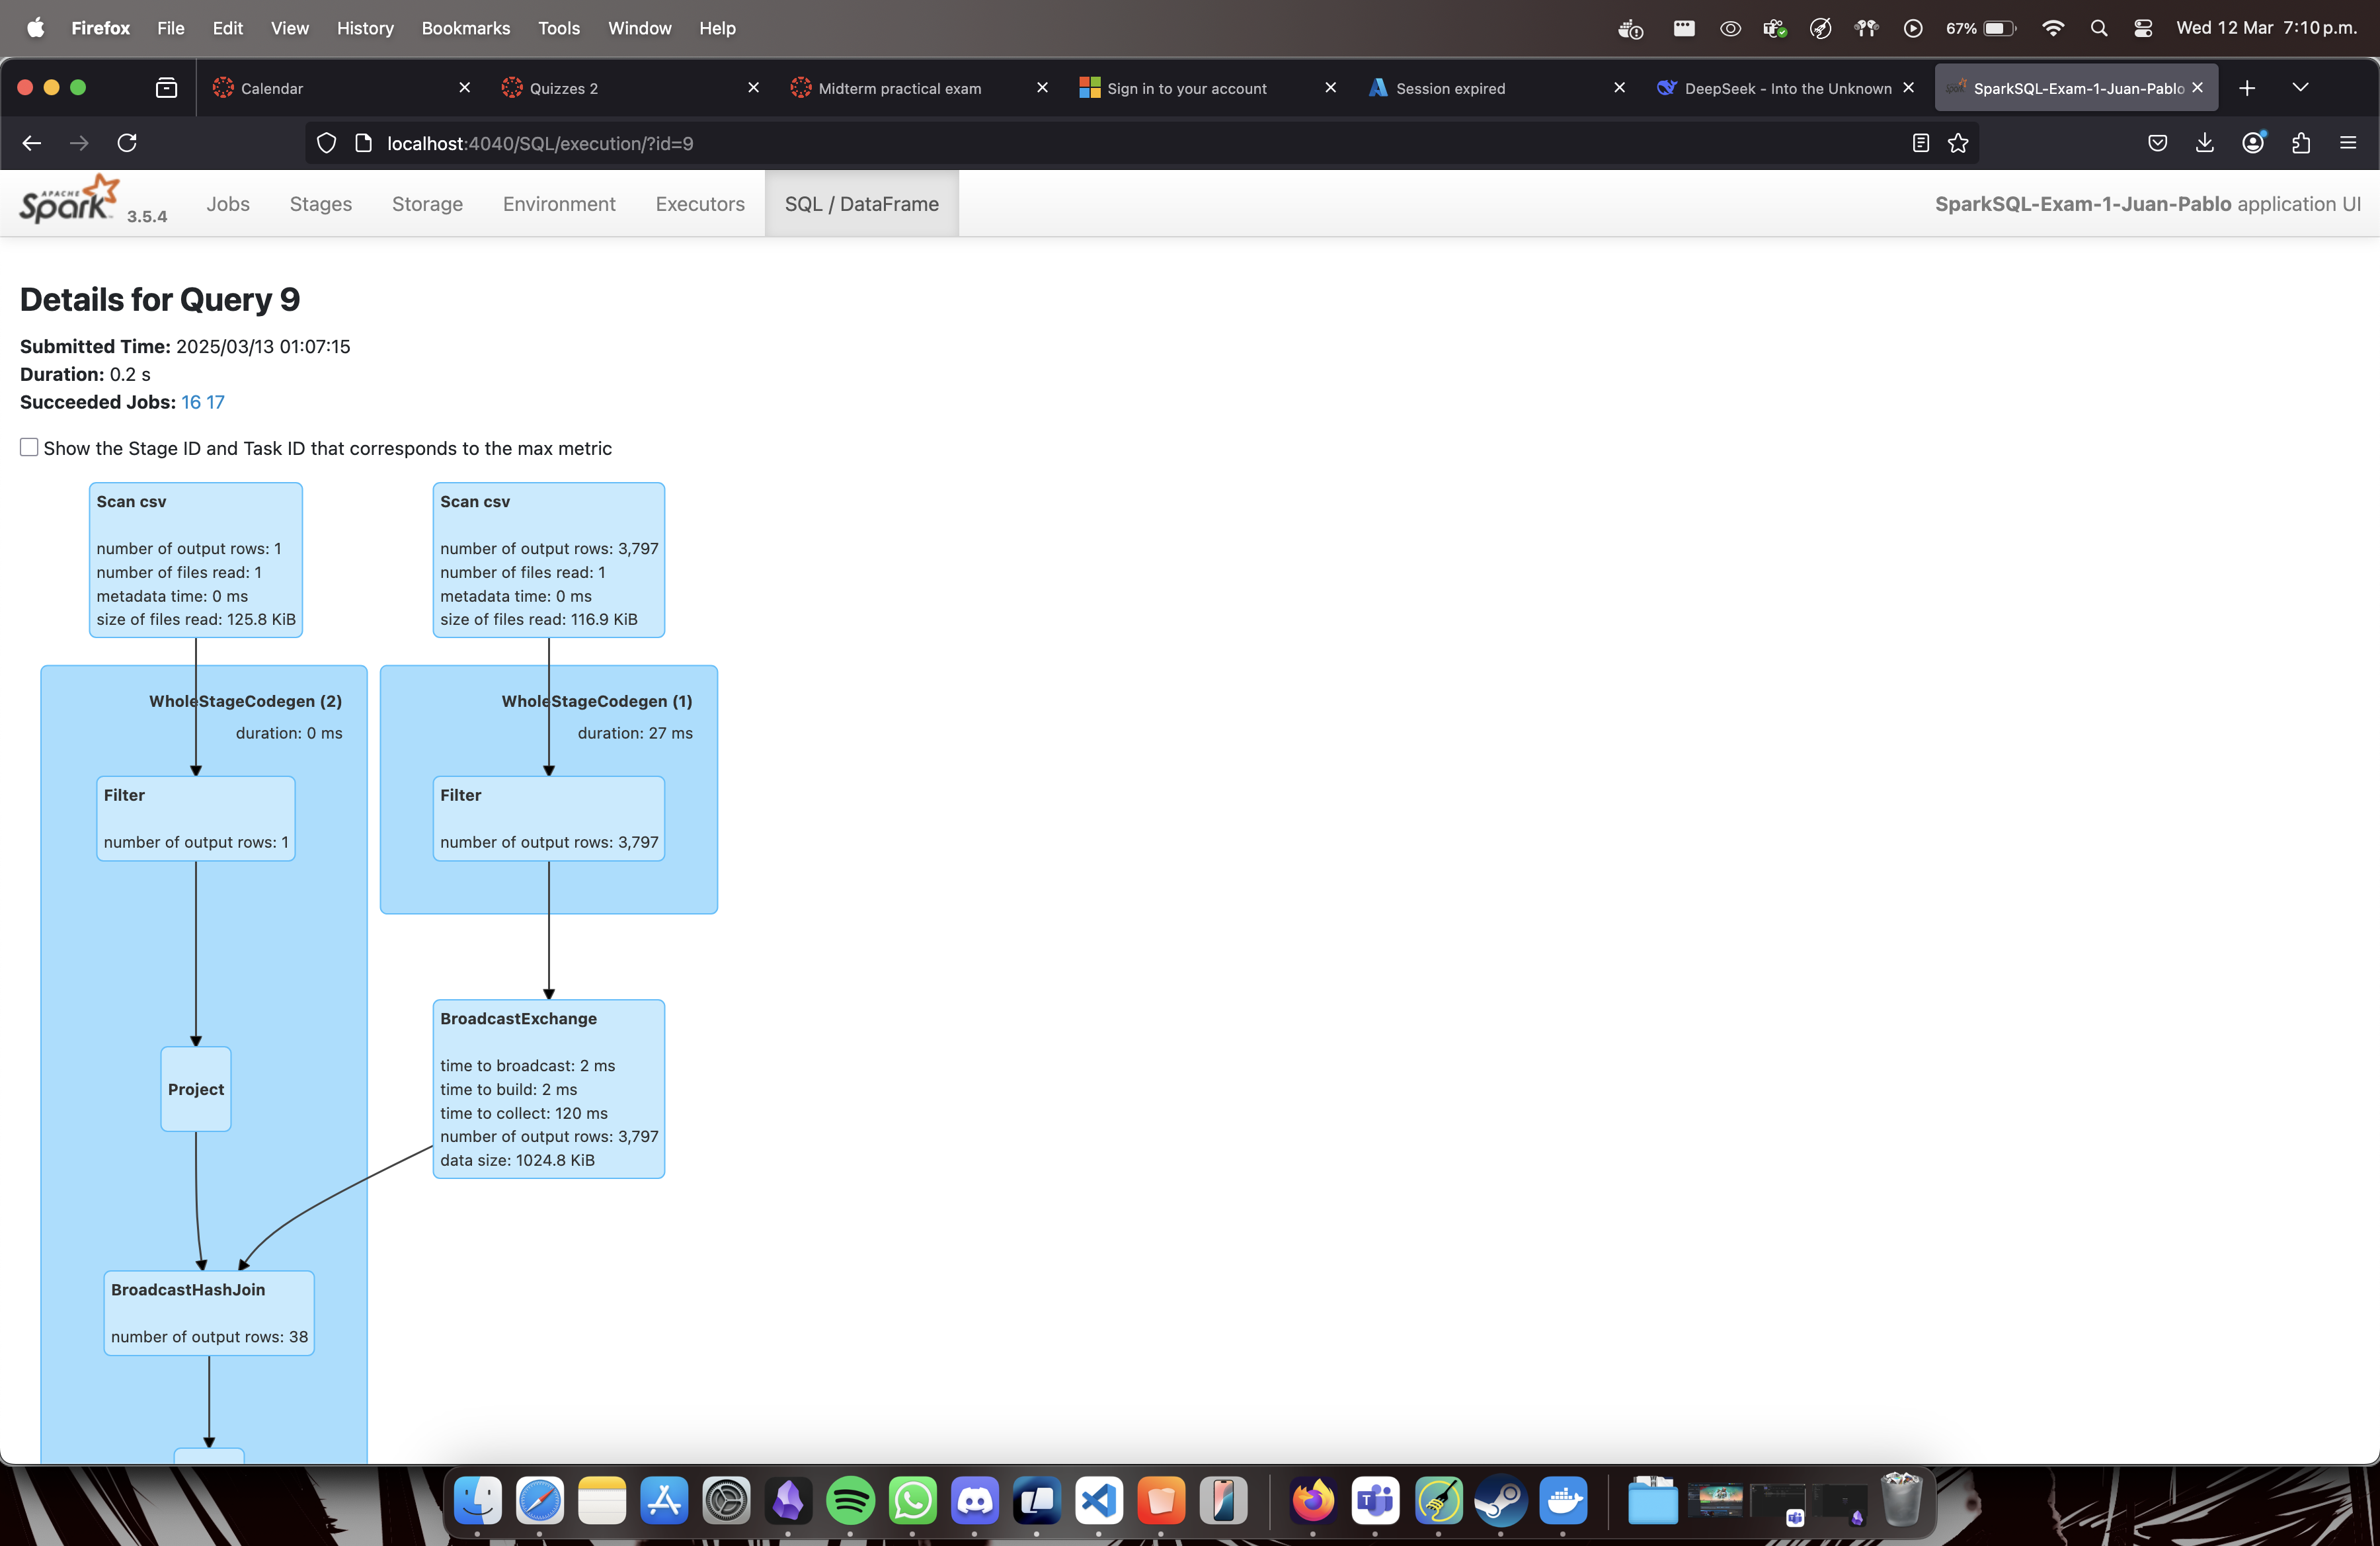

In [61]:
# Show the first 5 rows of the resulting data frame and count the rows of the resulting DataFrame

selected_df.show(5)
selected_df.count()

+------------+-----------+---------+
|product_name|sale_amount|sale_type|
+------------+-----------+---------+
| Product 100|      55.14|     High|
| Product 100|     694.06|     High|
| Product 100|      64.41|     High|
| Product 100|     472.98|     High|
| Product 100|     228.41|     High|
+------------+-----------+---------+
only showing top 5 rows



612